<a href="https://colab.research.google.com/github/GiladMadar/GiladMadar-Supervised-Learning--HW/blob/main/Supervised_Learning_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning - Linear Regression With Error Metrics

## Exercise instructions:

Use the ‘microsof_stock.csv’ file provided to you and execute the following instructions:



Data Exploration:

1. Load the provided `microsoft_stock.csv` file using pandas.

2. Display the first few rows of the dataframe to understand its structure.

3. Display basic information about the dataframe using appropriate pandas methods.

4. Check for any missing values in the dataset.

5. Print summary statistics of the dataframe to understand the distribution of the data.

6. Check the correlation between every column in the data frame and any other column.

7. Find what columns have positive / negative and zero correlation.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
microsoft_stocks_df = pd.read_csv('/content/microsoft_stocks.csv')
microsoft_stocks_df_copy = microsoft_stocks_df.copy()
microsoft_stocks_df_copy.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-01-12,47.540001,46.360001,47.419998,46.599998,23651900.0,40.786396
1,2015-01-13,47.910000,46.060001,46.970001,46.360001,35270600.0,40.576340
2,2015-01-14,46.240002,45.619999,45.959999,45.959999,29719600.0,40.226257
3,2015-01-15,46.380001,45.410000,46.220001,45.480000,32750800.0,39.806129
4,2015-01-16,46.279999,45.169998,45.310001,46.240002,35695300.0,40.471313


In [ ]:
microsoft_stocks_df_copy.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1925.000000,1925.000000,1925.000000,1925.000000,1.925000e+03,1925.000000
mean,140.301455,137.482982,138.934888,138.967096,3.009687e+07,134.947514
std,89.000722,87.030367,88.066413,88.062951,1.397862e+07,89.136791
min,40.740002,39.720001,40.340000,40.290001,7.425600e+06,35.359890
25%,61.410000,60.810001,61.009998,61.119999,2.150010e+07,56.459160
50%,108.739998,106.290001,107.860001,107.639999,2.669610e+07,102.966743
75%,215.000000,210.360001,213.100006,212.830002,3.426400e+07,209.119339
max,349.670013,342.200012,344.619995,343.109985,1.691640e+08,340.882812


In [ ]:
microsoft_stocks_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1925 non-null   object 
 1   High       1925 non-null   float64
 2   Low        1925 non-null   float64
 3   Open       1925 non-null   float64
 4   Close      1925 non-null   float64
 5   Volume     1925 non-null   float64
 6   Adj Close  1925 non-null   float64
dtypes: float64(6), object(1)
memory usage: 105.4+ KB


In [ ]:
# Testing NA Values in every Line and adding an NA-Count Column with the results
microsoft_stocks_df_copy['NA-Count'] = microsoft_stocks_df_copy.isna().sum(axis=1)
# Sorting the DataSet by the NA-Count Column So the Max NA_Count Value will be in the Top / Head
microsoft_stocks_df_copy.sort_values(by='NA-Count', ascending=False)


,Date,High,Low,Open,Close,Volume,Adj Close,NA-Count
0,2015-01-12,47.540001,46.360001,47.419998,46.599998,23651900.0,40.786396,0
1204,2019-10-23,137.449997,135.610001,136.880005,137.240005,29844600.0,133.344589,0
1292,2020-03-02,172.919998,162.309998,165.309998,172.789993,71030800.0,168.916931,0
1291,2020-02-28,163.710007,152.000000,152.410004,162.009995,97012700.0,158.378555,0
1290,2020-02-27,167.029999,157.979996,163.320007,158.179993,93174900.0,154.634399,0
...,...,...,...,...,...,...,...,...
637,2017-07-24,73.750000,73.129997,73.529999,73.599998,21394800.0,68.791718,0
636,2017-07-21,74.290001,73.169998,73.449997,73.790001,46717100.0,68.969307,0
635,2017-07-20,74.300003,73.279999,74.180000,74.220001,42361000.0,69.371216,0
634,2017-07-19,74.040001,73.449997,73.500000,73.860001,22416200.0,69.034721,0


In [ ]:
# Drop NA Values from evey line in the DataSet by using Pandas functions or Python BuiltIn Functions or methodes
microsoft_stocks_df_copy = microsoft_stocks_df_copy.dropna(axis=0)
microsoft_stocks_df_copy.head()



,Date,High,Low,Open,Close,Volume,Adj Close,NA-Count
0,2015-01-12,47.540001,46.360001,47.419998,46.599998,23651900.0,40.786396,0
1,2015-01-13,47.910000,46.060001,46.970001,46.360001,35270600.0,40.576340,0
2,2015-01-14,46.240002,45.619999,45.959999,45.959999,29719600.0,40.226257,0
3,2015-01-15,46.380001,45.410000,46.220001,45.480000,32750800.0,39.806129,0
4,2015-01-16,46.279999,45.169998,45.310001,46.240002,35695300.0,40.471313,0


In [ ]:
# Convering the Date Column into type of Date
microsoft_stocks_df_copy['Date'] = pd.to_datetime(microsoft_stocks_df_copy['Date'])
microsoft_stocks_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1925 non-null   datetime64[ns]
 1   High       1925 non-null   float64       
 2   Low        1925 non-null   float64       
 3   Open       1925 non-null   float64       
 4   Close      1925 non-null   float64       
 5   Volume     1925 non-null   float64       
 6   Adj Close  1925 non-null   float64       
 7   NA-Count   1925 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 120.4 KB


In [ ]:
microsoft_stocks_df_copy.sort_values(by='Date', ascending=True)
microsoft_stocks_df_copy.head()

,Date,High,Low,Open,Close,Volume,Adj Close,NA-Count
0,2015-01-12,47.540001,46.360001,47.419998,46.599998,23651900.0,40.786396,0
1,2015-01-13,47.910000,46.060001,46.970001,46.360001,35270600.0,40.576340,0
2,2015-01-14,46.240002,45.619999,45.959999,45.959999,29719600.0,40.226257,0
3,2015-01-15,46.380001,45.410000,46.220001,45.480000,32750800.0,39.806129,0
4,2015-01-16,46.279999,45.169998,45.310001,46.240002,35695300.0,40.471313,0


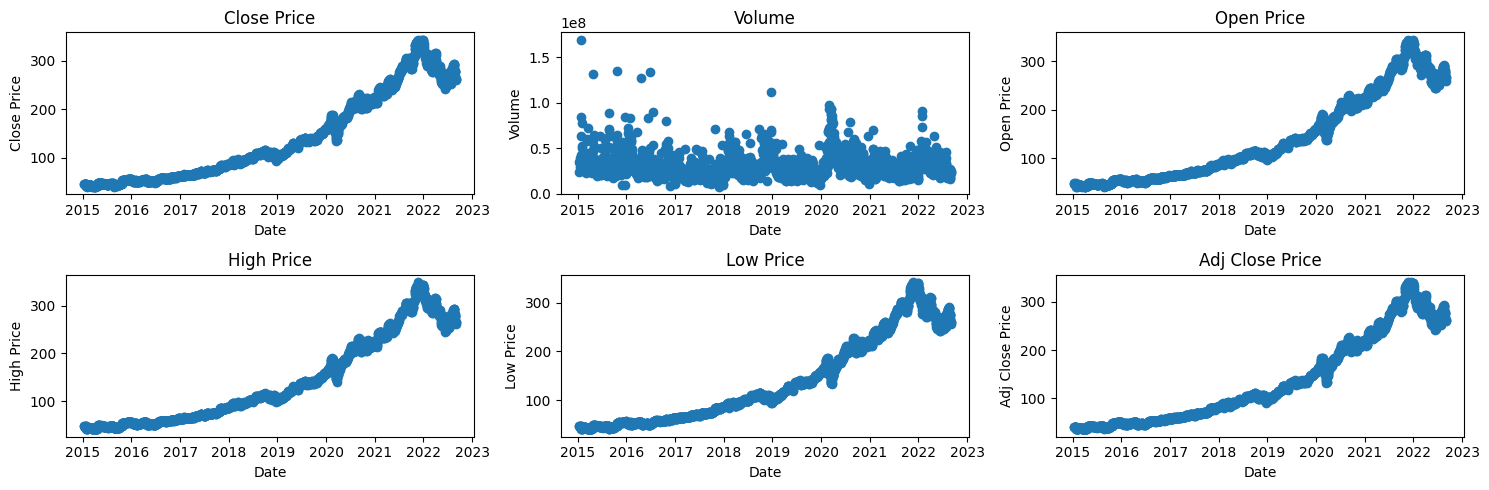

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 5))

axes[0, 0].scatter(microsoft_stocks_df_copy['Date'], microsoft_stocks_df_copy['Close'])
axes[0, 0].set_title('Close Price')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Close Price')

axes[0, 1].scatter(microsoft_stocks_df_copy['Date'], microsoft_stocks_df_copy['Volume'])
axes[0, 1].set_title('Volume')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Volume')

axes[0, 2].scatter(microsoft_stocks_df_copy['Date'], microsoft_stocks_df_copy['Open'])
axes[0, 2].set_title('Open Price')
axes[0, 2].set_xlabel('Date')
axes[0, 2].set_ylabel('Open Price')

axes[1, 0].scatter(microsoft_stocks_df_copy['Date'], microsoft_stocks_df_copy['High'])
axes[1, 0].set_title('High Price')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('High Price')

axes[1, 1].scatter(microsoft_stocks_df_copy['Date'], microsoft_stocks_df_copy['Low'])
axes[1, 1].set_title('Low Price')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Low Price')


axes[1, 2].scatter(microsoft_stocks_df_copy['Date'], microsoft_stocks_df_copy['Adj Close'])
axes[1, 2].set_title('Adj Close Price')
axes[1, 2].set_xlabel('Date')
axes[1, 2].set_ylabel('Adj Close Price')

plt.tight_layout()

plt.show()

### By the above we see that the next DataSet's colomns has correlation of: (Options: positive / negative /zero)
1. "Close" Column = positive
2. "Volume" Column = zer
3. "Open" Column = positive
4. "High" Column = positive
5. "Low" Column = positive
6. "Adj Close" Column = positive

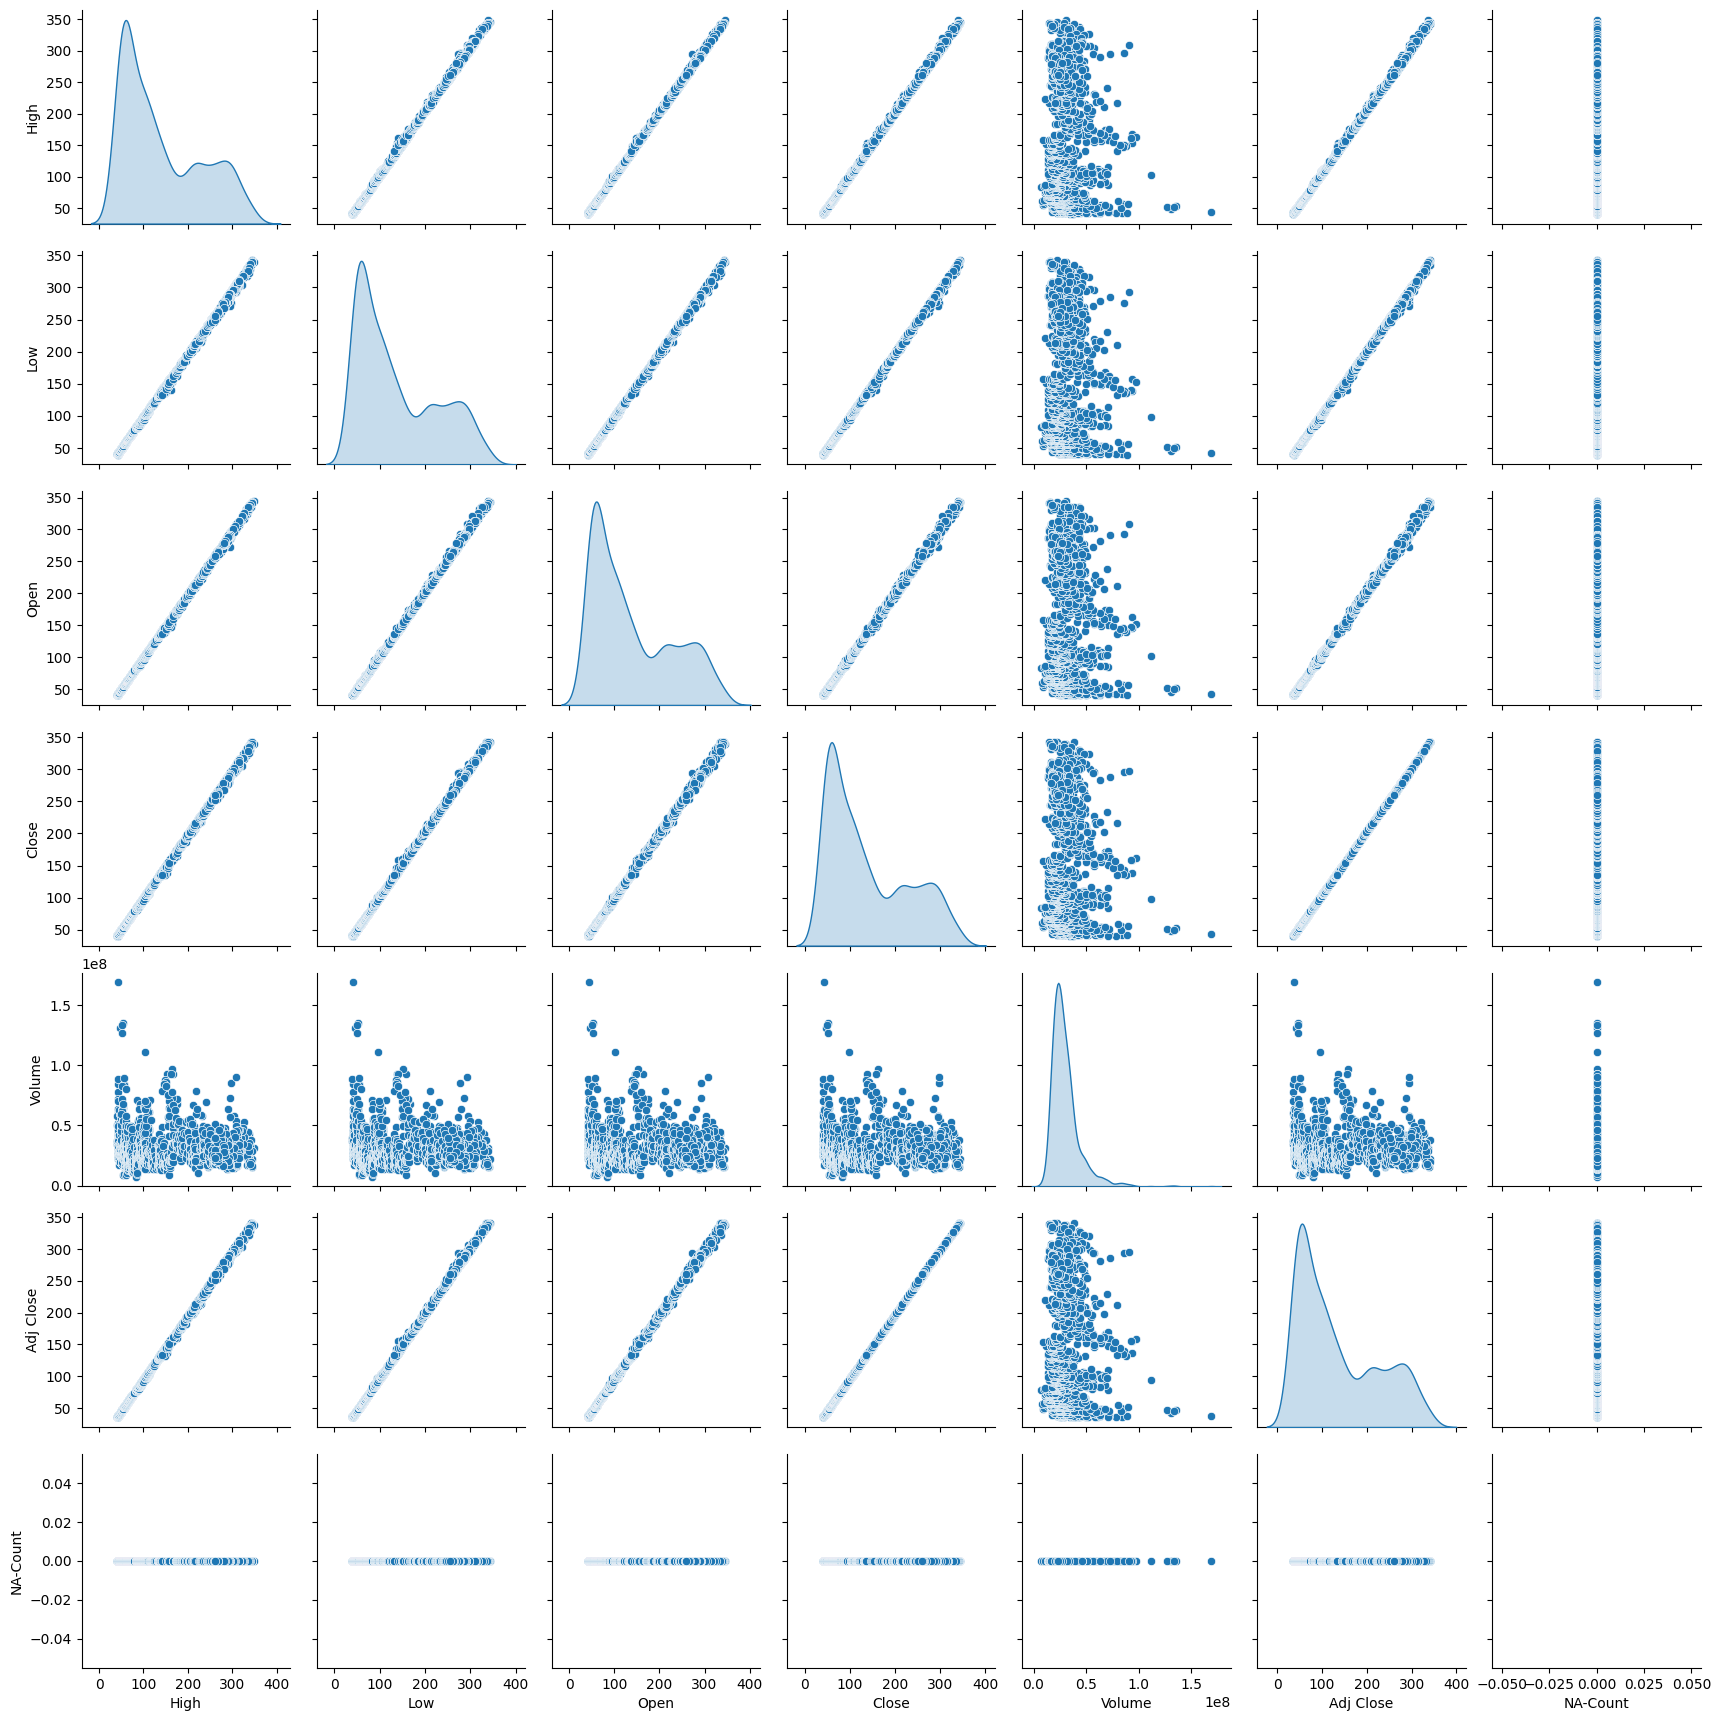

In [ ]:
# Print summary statistics in plots of the dataframe to understand the distribution of the data.
sns.pairplot(microsoft_stocks_df_copy, diag_kind='kde')

## Data Preparation

### Convert the `Date` column to a datetime format and set the  `Date` as the dataframe index.

From the entire dataframe select the following columns as the features:

`Open`

`High`

`Low`

`Volume`

Select the `Close` column as the label variable.

In [ ]:
microsoft_stocks_df_copy.set_index('Date', inplace=True)
microsoft_stocks_df_copy.head()

,High,Low,Open,Close,Volume,Adj Close,NA-Count
Date,,,,,,,
2015-01-12,47.540001,46.360001,47.419998,46.599998,23651900.0,40.786396,0
2015-01-13,47.910000,46.060001,46.970001,46.360001,35270600.0,40.576340,0
2015-01-14,46.240002,45.619999,45.959999,45.959999,29719600.0,40.226257,0
2015-01-15,46.380001,45.410000,46.220001,45.480000,32750800.0,39.806129,0
2015-01-16,46.279999,45.169998,45.310001,46.240002,35695300.0,40.471313,0


In [ ]:
new_microsoft_stocks_df_copy = microsoft_stocks_df_copy[['Open', 'High', 'Low', 'Volume']]
new_microsoft_stocks_df_copy.head()

,Open,High,Low,Volume
Date,,,,
2015-01-12,47.419998,47.540001,46.360001,23651900.0
2015-01-13,46.970001,47.910000,46.060001,35270600.0
2015-01-14,45.959999,46.240002,45.619999,29719600.0
2015-01-15,46.220001,46.380001,45.410000,32750800.0
2015-01-16,45.310001,46.279999,45.169998,35695300.0


In [ ]:
label = microsoft_stocks_df_copy['Close']
label.head()

,Close
Date,
2015-01-12,46.599998
2015-01-13,46.360001
2015-01-14,45.959999
2015-01-15,45.480000
2015-01-16,46.240002


## Linear Regression Machine Learning:

### Perform Linear Regression machine learning on the features selected

1. Use train / test split to split the data (select 30% columns for the test set and seed of 42).

2. Apply a simple linear regression model with default values.

3. Evaluate your model results using MAE, MSE, RMSE error metrics.

4. Check what is the error percentage of your MAE and RMSE metric results.

5. Decide if your error percentage is acceptable or not.

6. Plot the y_test vs residuals scatter plot and determine if your data set was a good fit for linear regression modeling.  

MAE: 0.61
MSE: 1.08
RMSE: 1.04
MAE Percentage: 0.43%
RMSE Percentage: 0.74%
The error percentage is acceptable.


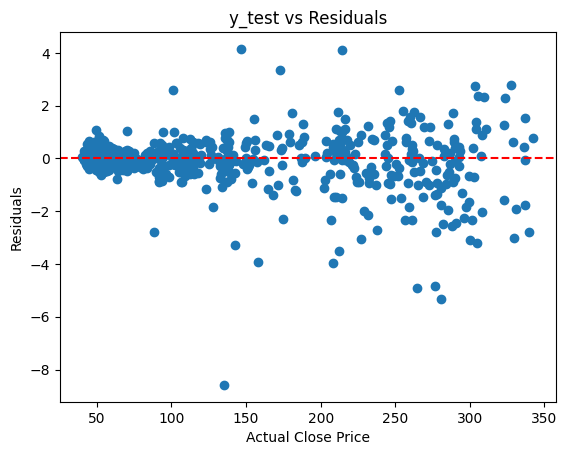

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

X = new_microsoft_stocks_df_copy[['Open', 'High', 'Low', 'Volume']]
y = label

# Splitting the data into 70% train and 30% test with seed 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating and training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Calculate error percentage
mae_percentage = (mae / y_test.mean()) * 100
rmse_percentage = (rmse / y_test.mean()) * 100

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE Percentage: {mae_percentage:.2f}%")
print(f"RMSE Percentage: {rmse_percentage:.2f}%")

# Decide if the error percentage is acceptable
if mae_percentage < 5 and rmse_percentage < 5:
    print("The error percentage is acceptable.")
else:
    print("The error percentage is not acceptable.")

# Plot y_test vs residuals
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Close Price')
plt.ylabel('Residuals')
plt.title('y_test vs Residuals')
plt.show()

## Model Deployment

### 1. Once you happy with your model results train your Linear Regression model on the entire dataset

2. Print the final beta coefficient the model found for each feature

3. Export your final model into a joblib file

4. Import your final model from the joblib file and load it back to your working area

5. Use the import model to predict the ‘close’ value of the following unknown data points:

**Open:** 250.00, **High:** 255.00, **Low:** 249.50, **Volume:** 23,000,000

**Open:** 260.00, **High:** 265.00, **Low:** 259.50, **Volume:** 21,500,000

**Open:** 245.00, **High:** 250.00, **Low:** 244.50, **Volume:** 22,000,000

In [ ]:
import joblib

model.fit(X, y)

coefficients = model.coef_
intercept = model.intercept_
features = X.columns

print("Final Beta Coefficients:")
for feature, coef in zip(features, coefficients):
    print(f"{feature}: {coef:.2f}")
print(f"Intercept: {intercept:.2f}")

joblib.dump(model, 'linear_regression_model.joblib')

imported_model = joblib.load('linear_regression_model.joblib')

new_data = pd.DataFrame({
    'Open': [250.00, 260.00, 245.00],
    'High': [255.00, 265.00, 250.00],
    'Low': [249.50, 259.50, 244.50],
    'Volume': [23000000, 21500000, 22000000]
})

predicted_close = imported_model.predict(new_data)

print("\nPredicted 'Close' values for new data points:")
for i, pred in enumerate(predicted_close):
    print(f"Data point {i + 1}: {pred:.2f}")


Final Beta Coefficients:
Open: -0.66
High: 0.85
Low: 0.81
Volume: -0.00
Intercept: 0.13

Predicted 'Close' values for new data points:
Data point 1: 253.96
Data point 2: 263.97
Data point 3: 248.96
